<a href="https://colab.research.google.com/github/kvinne-anc/Keras-and-Tensor/blob/main/NN_KerasModel_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Autograded Notebook (Canvas & CodeGrade)

This notebook will be automatically graded. It is designed to test your answers and award points for the correct answers. Following the instructions for each Task carefully.
Instructions

- **Download** this notebook as you would any other ipynb file 
- **Upload** to Google Colab or work locally (if you have that set-up)
- **Delete** `raise NotImplementedError()`

- **Write** your code in the `# YOUR CODE HERE` space


- **Execute** the Test cells that contain assert statements - these help you check your work (others contain hidden tests that will be checked when you submit through Canvas)

- **Save** your notebook when you are finished
- **Download** as a ipynb file (if working in Colab)
- **Upload** your complete notebook to Canvas (there will be additional instructions in Slack and/or Canvas)




## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron (i.e. Neural Network)
    - Analyze and Compare
4. [Keras MMP](#Q3)


____

# Before you submit your notebook you must first

1) Restart your notebook's Kernel

2) Run all cells sequentially, from top to bottom, so that cell numbers are sequential numbers (i.e. 1,2,3,4,5...)
- Easiest way to do this is to click on the **Cell** tab at the top of your notebook and select **Run All** from the drop down menu. 

____

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:**

- **Input Layer:** 

- **Hidden Layer:** 

- **Output Layer:**

- **Activation:** 

Neuron - A neuron is akin to a biological neuron. It is a connection process, defined by a mathematical function, which receives information and processes it to return a conclusion. 

Input layer - the first layer of the neuron. It is like the receptor, which takes in the initial data. 

Hidden layer - this is like a synapse. It it the layer which does the bulk of the processing and the way we define it (the parameters, activations, etc. that we choose) determines this "thought process".

Output layer - this layer returns the final result of our neuron's 'thought process'. 

Activation - The activation function determines how our neuron 'thinks'; the elements that we choose to use are responsible for for weighing biases and determining which elemnts and relationships between these elements should be important and which are less so and which are white noise. It gives our neuron a scope of how to attack a problem, or how to find the most relevant connections between the data. 

- `Explain` how Back-propagation works 
- `Explain` how Gradient Descent works (mention the learning rate)
- `Explain` how Back-propagation and Gradient Descent are related   

Use your own words, but feel free to reference external materials for this question. 

- Back propagation takes the error between the predicted value and the real of the output layer as an error of the weights and biases (gradient of the loss function) in the original calculation and feeds it back through the network with the goal of reducing the error by adjusting the weights and biases, taking the new information into account. 

- Gradient descent an optimization algorithm that helps us find the slope that is the quickest route from where we are to where we are trying to be. The gradient optimization algorithim helps to sort error and optimal value. The learning rate is the speed, or grade/unit of measure, by which the algorithm changes with each new iteration. If the algorithm only needs a small tweak but we set the rate too high then it jumps all over and won't hit the target, too small and it will take too long to get there. 

- Backpropagation method finds the gradient which  and the gradient descent uses the gradient to 'learn' and find the best set of parameters. 

Remember our Simple Perceptron Class from Monday. 

- Describe the process of making a prediction, i.e. how do you go from inputs to outputs?

The process of making a prediction is straightforward enough in theory. We start with a dataset, split it into train and test, or even a simple x and y. We can define a function and create a model, define the type of of model (sequential/functional) and add hidden layers and define the parameters that we want to test and define the dimensions of the output layer. The we run the model and go from there. 

<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using `Keras`. After you build these two models, compare the results of the model.

In [ ]:
"""
Our Dataset
"""
import numpy as np
import keras
from keras.models import Sequential 
from keras.layers import Dense 


rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

In [ ]:
X.shape

(300, 2)

In [ ]:
X

array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502],
       [ 0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826],
       [ 0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ],
       [ 0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567],
       [ 0.04575852, -0.18718385],
       [ 1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252],
       [-0.88778575, -1.98079647],
       [-0.34791215,  0.15634897],
       [ 1.23029068,  1.20237985],
       [-0.38732682, -0.30230275],
       [-1.04855297, -1.42001794],
       [-1.70627019,  1.9507754 ],
       [-0.50965218, -0.4380743 ],
       [-1.25279536,  0.77749036],
       [-1.61389785, -0.21274028],
       [-0.89546656,  0.3869025 ],
       [-0.51080514, -1.18063218],
       [-0.02818223,  0.42833187],
       [ 0.06651722,

In [ ]:
y

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
2**2

4

In [ ]:
4**4

256

### Simple Perceptron
Construct a simple perceptron using Keras. 

Make sure to include the following in your model:
- Add `1 dense layer` with a `single neuron` 
- Use a `sigmoid activation function`
- Set `epochs` to 10 
- Use the version of `crossentropy loss` that is appropriate for this data.

Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 


In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#define
model1 = Sequential()
model1.add(Dense(1, input_dim=2, activation='sigmoid'))
#compile
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.fit(X, y, epochs=10, batch_size=32, verbose=0)
h1 = model1.evaluate(X, y, verbose=0)
print("Accuracy", h1)

Accuracy [0.8798381686210632, 0.49666666984558105]


In [ ]:
# Visible test
assert len(model1.get_config()["layers"]) == 2
assert len(h1.epochs) <=10

AttributeError: ignored

In [ ]:
assert len(h2.epochs) <=10
#Just can't win, two tries, two errors - 
#I don't understand why KT wouldn't have epochs but I need to move on. 

AttributeError: ignored

In [ ]:
model1.get_config()["layers"]

[{'class_name': 'InputLayer',
  'config': {'batch_input_shape': (None, 2),
   'dtype': 'float32',
   'name': 'dense_8_input',
   'ragged': False,
   'sparse': False}},
 {'class_name': 'Dense',
  'config': {'activation': 'sigmoid',
   'activity_regularizer': None,
   'batch_input_shape': (None, 2),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'dtype': 'float32',
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'GlorotUniform',
    'config': {'seed': None}},
   'kernel_regularizer': None,
   'name': 'dense_8',
   'trainable': True,
   'units': 1,
   'use_bias': True}}]

In [ ]:
# Hidden tests - you will see the results when you submit to Canvas

### Multi-Layer Perceptron
Now construct a multi-layer perceptron model (also known as a neural network). 

Your neural network `must` have: 
- `2` Hidden Layers
- Select any number between `5-32` for the number of neurons in each hidden layers
- Your pick of activation function and optimizer
- Incorporate the `Callback function` below into your model
- Set epochs to `100`
- Your model should be called `model2` 
- Save the results of your fit statement to a variable called `h2`. 
- Use the version of `crossentropy loss` that is appropriate for this data.

In [ ]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        # if model reaches 99% accuracy, training is terminated 
        acc_threshold = 0.99
        if(logs.get('accuracy') > acc_threshold):   
            self.model.stop_training = True
            self.model.callback_used = True

In [ ]:
# build and fit model
model2 = Sequential()
model2.add(Dense(12, input_dim=2, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
# compile the keras model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model2.fit(X, y, epochs=100, batch_size=10)
# evaluate the keras model
_, accuracy = model2.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))


Epoch 1/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7888 - accuracy: 0.3314
Epoch 2/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7353 - accuracy: 0.4100
Epoch 3/100
30/30 [==============================] - 0s 992us/step - loss: 0.6941 - accuracy: 0.5242
Epoch 4/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6987 - accuracy: 0.4917
Epoch 5/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6680 - accuracy: 0.5857
Epoch 6/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6573 - accuracy: 0.6057
Epoch 7/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6485 - accuracy: 0.6431
Epoch 8/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6305 - accuracy: 0.6651
Epoch 9/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6200 - accuracy: 0.6407
Epoch 10/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5960 - accuracy: 0.7002
Epoch 1

In [ ]:
h2 = model2.fit(X, y, epochs=100, batch_size=10)

Epoch 1/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0973 - accuracy: 0.9933
Epoch 2/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0965 - accuracy: 0.9933
Epoch 3/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0958 - accuracy: 0.9867
Epoch 4/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0940 - accuracy: 0.9933
Epoch 5/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0928 - accuracy: 0.9933
Epoch 6/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0915 - accuracy: 0.9933
Epoch 7/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0908 - accuracy: 0.9933
Epoch 8/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0900 - accuracy: 0.9867
Epoch 9/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0883 - accuracy: 0.9933
Epoch 10/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0875 - accuracy: 0.9933
Epoch 11/

In [ ]:
# Visible test
assert len(model2.get_config()["layers"]) == 4, "You should have 4 layers: Input, hidden 1, hidden 2, output."
assert 5 <= model2.get_config()["layers"][1]["config"]["units"] <= 32, "You should have 5 - 32 units in hidden layer 1, but don't."
assert 5 <= model2.get_config()["layers"][2]["config"]["units"] <= 32, "You should have 5 - 32 units in hidden layer 2, but don't."
assert h2.params["epochs"] == 100, "You didn't set epochs to 100."

In [ ]:
# Hidden tests - you will see the results when you submit to Canvas

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. 

Install the package `mlxtend` into the environment you are using for the sprint challenge.

You can install this package using the following statement in the terminal

```python
pip install mlxtend
```

Or you can install this package using the following statement in your notebook

```python
!pip install mlxtend
```

If you choose to install this package from within your notebook, be sure to delete the install statement afterwards so that CodeGrade doesn't try to install it and potentially crash. 


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

In [ ]:
!pip install mlxtend


In [ ]:
X.shape, y.shape

((300, 2), (300,))

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


AttributeError: ignored

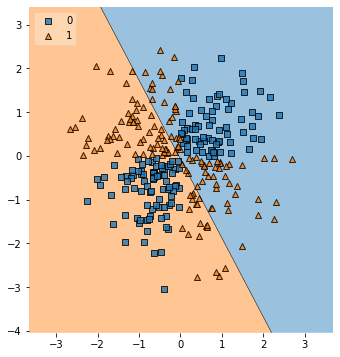

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions


fig = plt.figure(figsize=(12,6))

for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

1) Why does the Perceptron (`model1`) only achieve about 50% accuracy? 

2) What is the architectural property of the Multi-Layer Perceptron that allows it to more accurately learn the relationship between X and y? 
- Hint: recall that each layer represents a vector space and they usually have a different number of dimensions, $\mathbb{R}^N$.
   

The perceptron model - because it is not learning with backpropagation
The MLP is using backpropagation to fine tune the weights and biases


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import tensorflow as tf
from matplotlib import pyplot
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.constraints import max_norm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## 3. Keras MMP <a id="Q3"></a>

- Implement a Multilayer Perceptron architecture of your choosing using the Keras library. 
- Train your model and report its baseline accuracy. 
- Then `hyper-parameters tune two parameters each with no more than 2 values each`
    - Due to limited computational resources on CodeGrade `DO NOT INCLUDE ADDITIONAL PARAMETERS OR VALUES PLEASE`
- Report your optimized model's accuracy
- Use the Heart Disease Dataset provided (binary classification)
- Use an appropriate loss function for a binary classification task
- Use an appropriate activation function on the final layer of your network.
- Train your model using verbose output for ease of grading.
- Use GridSearchCV to hyper-parameters tune your model. 
    - **Use `n_jobs` = 1**
- When hyper-parameters tuning, show you work by adding code cells for each new experiment.
- Report the accuracy for each combination of hyper-parameters as you test them so that we can easily see which resulted in the highest accuracy.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# load data
data_path = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv'
df1 = pd.read_csv(data_path)
df1 = df1.sample(frac=1)
print(df1.shape)
df1.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2,1
91,57,1,0,132,207,0,1,168,1,0.0,2,0,3,1
116,41,1,2,130,214,0,0,168,0,2.0,1,0,2,1
233,64,1,0,120,246,0,0,96,1,2.2,0,1,2,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
df = df1.to_numpy()

In [ ]:
X.shape

(303, 13)

In [ ]:
# Create an input matrix named 'X' store it in a 2D numpy array
X = df[:,0:13]
y = df[:,13]
# Create an output vector for the labels named 'Y', store it in 1D numpy array


def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

#evaluate
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))



Baseline: -0.15 (0.04) MSE


In [ ]:
# Visible Testing
assert X.shape[0] == 303, "Did you drop/lose some rows in X? Did you properly load and split the data?"
assert X.shape[1] == 13, "Did you drop/lose some columns in X? Did you properly load and split the data?"
assert len(y)== 303, "Did you drop/lose some rows in Y? Did you properly load and split the data?"

In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# Create a function named 'create_model' that returns a complied keras model -  required for KerasClassifier
from keras.wrappers.scikit_learn import KerasClassifier

def create_model():
	# create model
	model = Sequential()
	model.add(Dense(26, input_dim=13, activation='relu'))
	model.add(Dense(2, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
 
estimator = KerasClassifier(build_fn=create_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Baseline: 76.61% (9.46%)


In [ ]:
# Visible Testing
assert create_model().__module__ == 'tensorflow.python.keras.engine.sequential', "create_model should return a keras model that was created using the Sequential class."

In [ ]:
# Pass 'create_model' into KerasClassifier, store KerasClassifier to a variable named 'model'
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=5, verbose=0)

In [ ]:
# Visible Testing
assert model.__module__ == 'tensorflow.python.keras.wrappers.scikit_learn', "model should be a instance of KerasClassifier."

In [ ]:
# Define the grid search parameters inside a dictionary named 'param_grid' 
# Use 2 hyper-parameters with 2 possible values for each 

param_grid = dict(epochs=[10,20,30], batch_size=[10,20,40])
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

In [ ]:
assert len(param_grid.keys()) == 2, "Did you create a param dict with 2 hyper-parameters as keys?"

In [ ]:
# Create Grid Search object and name it 'gs'
# Run Grid Search 

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.798680 using {'batch_size': 10, 'epochs': 30}
0.679868 (0.032672) with: {'batch_size': 10, 'epochs': 10}
0.702970 (0.070011) with: {'batch_size': 10, 'epochs': 20}
0.798680 (0.033657) with: {'batch_size': 10, 'epochs': 30}
0.567657 (0.102363) with: {'batch_size': 20, 'epochs': 10}
0.712871 (0.045011) with: {'batch_size': 20, 'epochs': 20}
0.660066 (0.028391) with: {'batch_size': 20, 'epochs': 30}
0.514852 (0.035238) with: {'batch_size': 40, 'epochs': 10}
0.663366 (0.058295) with: {'batch_size': 40, 'epochs': 20}
0.646865 (0.044524) with: {'batch_size': 40, 'epochs': 30}


In [ ]:
# your grid_result object should be able to run in this code 
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.7986798683802286 using {'batch_size': 10, 'epochs': 30}
Means: 0.6798680027325948, Stdev: 0.03267161881186689 with: {'batch_size': 10, 'epochs': 10}
Means: 0.702970286210378, Stdev: 0.0700105796278302 with: {'batch_size': 10, 'epochs': 20}
Means: 0.7986798683802286, Stdev: 0.0336568844486241 with: {'batch_size': 10, 'epochs': 30}
Means: 0.5676567554473877, Stdev: 0.10236344535014313 with: {'batch_size': 20, 'epochs': 10}
Means: 0.7128712932268778, Stdev: 0.045010509088070284 with: {'batch_size': 20, 'epochs': 20}
Means: 0.6600659886995951, Stdev: 0.028390503971451875 with: {'batch_size': 20, 'epochs': 30}
Means: 0.5148515005906423, Stdev: 0.0352378854744143 with: {'batch_size': 40, 'epochs': 10}
Means: 0.6633663376172384, Stdev: 0.05829546088508044 with: {'batch_size': 40, 'epochs': 20}
Means: 0.646864672501882, Stdev: 0.04452387307814832 with: {'batch_size': 40, 'epochs': 30}
